Chargement du dataset Breast Cancer...
Aperçu des données Breast Cancer:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dim

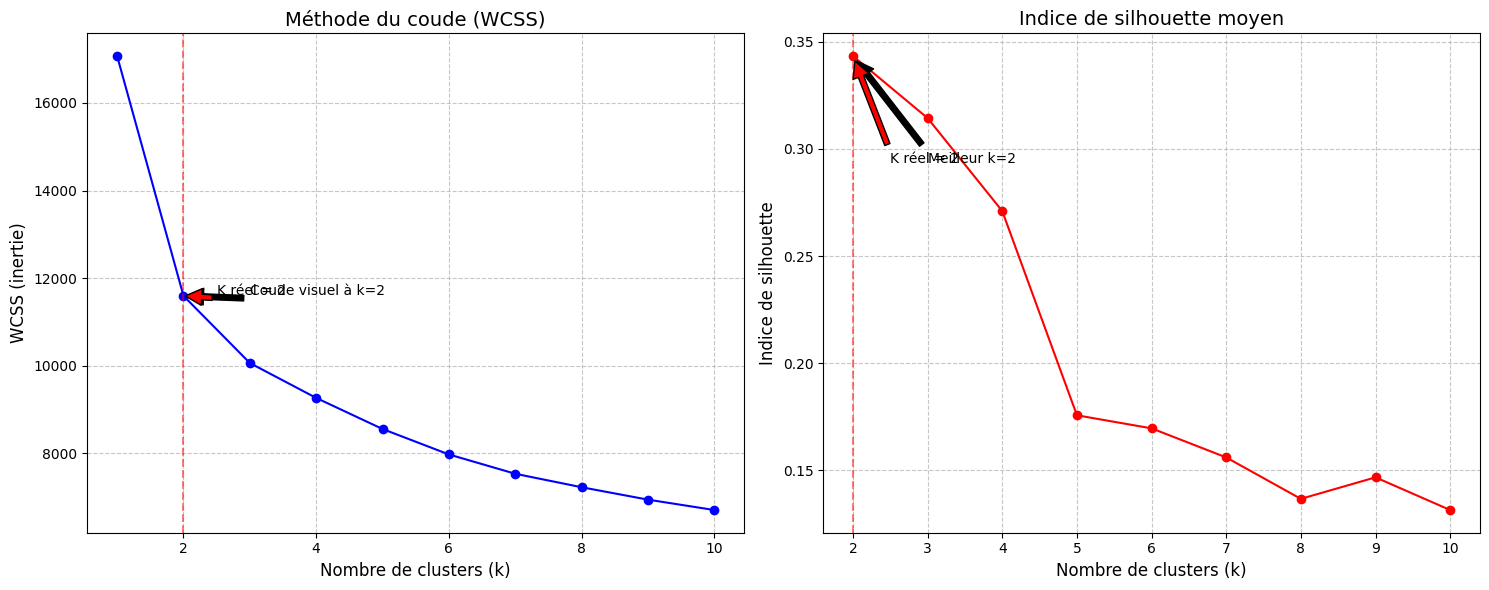


Résultats de l'analyse:
K | WCSS (inertie) | Silhouette
----------------------------------------
1 | 17070.00 | 0.0000
2 | 11595.53 | 0.3434
3 | 10061.80 | 0.3144
4 | 9264.87 | 0.2710
5 | 8555.52 | 0.1756
6 | 7974.62 | 0.1696
7 | 7533.72 | 0.1560
8 | 7226.13 | 0.1366
9 | 6942.87 | 0.1467
10 | 6705.80 | 0.1314

Méthode du coude: K optimal = 2
Méthode de la silhouette: K optimal = 2
Nombre réel de classes: 2
Les deux méthodes identifient correctement le nombre réel de classes (K=2).

Nombre optimal de clusters retenu: K=2

=== Comparaison entre K-means standard et K-means++ pour K = 2 ===

Comparaison des métriques entre K-means standard et K-means++:
     Métrique  K-means standard     K-means++  Différence
0         ARI          0.653625      0.653625         0.0
1     Inertie      11595.526607  11595.526607         0.0
2  Silhouette          0.343382      0.343382         0.0


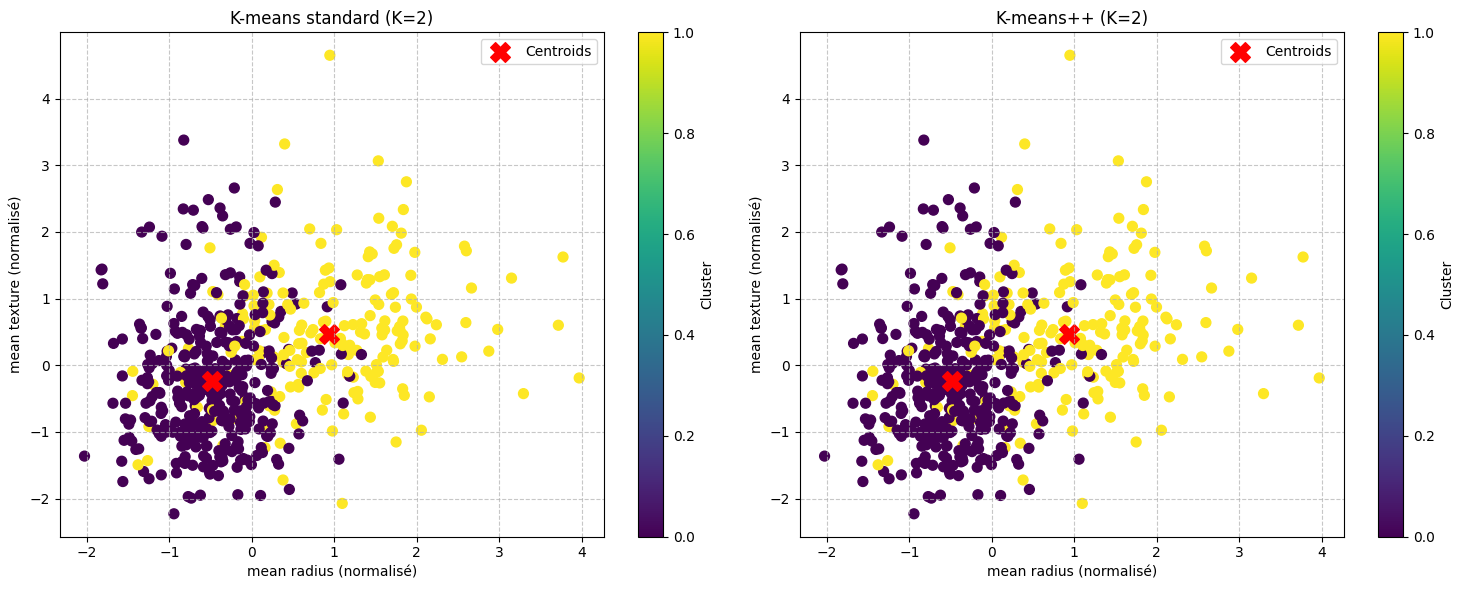


Analyse de la convergence:
Nombre d'itérations pour K-means standard: 8
Nombre d'itérations pour K-means++: 7
Différence: 1 itérations

Distribution des types de tumeurs dans chaque cluster:
K-means standard:
Diagnosis (0=Malignant, 1=Benign)    0    1
Cluster                                    
0                                   36  339
1                                  176   18

K-means++:
Diagnosis (0=Malignant, 1=Benign)    0    1
Cluster                                    
0                                   36  339
1                                  176   18

Analyse de la stabilité avec différents random_states:

K-means standard - Statistiques:
       Random State    K       ARI       Inertie  Silhouette  Iterations
count      5.000000  5.0  5.000000      5.000000    5.000000    5.000000
mean      20.400000  2.0  0.667353  11595.620631    0.344194    7.800000
std       16.456002  0.0  0.012532      0.085831    0.000741    2.167948
min        0.000000  2.0  0.653625  11595.52

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.cluster import KMeans

# 1. Charger le dataset Breast Cancer
print("Chargement du dataset Breast Cancer...")
cancer = load_breast_cancer()
X = cancer.data
y_true = cancer.target

# Créer un DataFrame pour une meilleure visualisation des données
cancer_df = pd.DataFrame(data=X, columns=cancer.feature_names)
cancer_df['target'] = y_true
print("Aperçu des données Breast Cancer:")
print(cancer_df.head())
print(f"Dimensions du dataset: {X.shape}")
print(f"Nombre de caractéristiques: {X.shape[1]}")
print(f"Répartition des classes: {np.bincount(y_true)}")
print(f"Noms des classes: {cancer.target_names}")
print(f"Nombre réel de classes dans le dataset: 2 (malin et bénin)")

# 2. Normaliser les données
print("\nNormalisation des données...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Vérifier qu'il n'y a pas de valeurs manquantes
print(f"Valeurs manquantes: {np.isnan(X_scaled).sum()}")

# 3. Détermination du nombre de clusters par la méthode du coude et de la silhouette
print("\n=== Détermination du nombre optimal de clusters ===")
wcss = []  # Within-Cluster Sum of Squares (WCSS) ou inertie
silhouette_scores = []  # Scores de silhouette pour chaque K
k_range = range(1, 11)  # Tester de 1 à 10 clusters

# Calculer l'inertie et le score de silhouette pour différentes valeurs de K
for k in k_range:
    # Utiliser scikit-learn KMeans standard pour calculer les métriques
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    # Calculer le score de silhouette (pas disponible pour k=1)
    if k > 1:
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    else:
        silhouette_scores.append(0)  # Silhouette non définie pour k=1

# Tracer les deux métriques en fonction de K
plt.figure(figsize=(15, 6))

# Méthode du coude
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-')
plt.title('Méthode du coude (WCSS)', fontsize=14)
plt.xlabel('Nombre de clusters (k)', fontsize=12)
plt.ylabel('WCSS (inertie)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

coude_k = 2  # inspection visuelle du graphique

plt.annotate(f'Coude visuel à k={coude_k}',
             xy=(coude_k, wcss[coude_k-1]),
             xytext=(coude_k+1, wcss[coude_k-1]+10),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Ajouter une référence pour K=2 (nombre réel de classes)
plt.axvline(x=2, color='r', linestyle='--', alpha=0.5)
plt.annotate('K réel = 2',
             xy=(2, wcss[1]),
             xytext=(2.5, wcss[1]+20),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Indice de silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores[1:], 'ro-')  # Commencer à k=2
plt.title('Indice de silhouette moyen', fontsize=14)
plt.xlabel('Nombre de clusters (k)', fontsize=12)
plt.ylabel('Indice de silhouette', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Identifier le k avec le meilleur score de silhouette
best_silhouette_k = np.argmax(silhouette_scores[1:]) + 2  # +2 car on commence à k=2

plt.annotate(f'Meilleur k={best_silhouette_k}',
             xy=(best_silhouette_k, silhouette_scores[best_silhouette_k-1]),
             xytext=(best_silhouette_k+1, silhouette_scores[best_silhouette_k-1]-0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Ajouter une référence pour K=2 (nombre réel de classes)
plt.axvline(x=2, color='r', linestyle='--', alpha=0.5)
plt.annotate('K réel = 2',
             xy=(2, silhouette_scores[1]),
             xytext=(2.5, silhouette_scores[1]-0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.tight_layout()
plt.savefig('breast_cancer_elbow_silhouette_method.png')
plt.show()

# Résultats numériques et analyse
print("\nRésultats de l'analyse:")
print("K | WCSS (inertie) | Silhouette")
print("-" * 40)
for k in k_range:
    print(f"{k} | {wcss[k-1]:.2f} | {silhouette_scores[k-1]:.4f}")

print(f"\nMéthode du coude: K optimal = {coude_k}")
print(f"Méthode de la silhouette: K optimal = {best_silhouette_k}")
print(f"Nombre réel de classes: 2")

# Analyse des résultats et comparaison avec le nombre réel de classes
if coude_k == 2 and best_silhouette_k == 2:
    print("Les deux méthodes identifient correctement le nombre réel de classes (K=2).")
    optimal_k = 2
elif coude_k == 2:
    print("La méthode du coude identifie correctement le nombre réel de classes (K=2).")
    print(f"La méthode de la silhouette suggère K={best_silhouette_k}, ce qui diffère du nombre réel.")
    print("Nous retenons K=2 basé sur la connaissance du dataset et la méthode du coude.")
    optimal_k = 2
elif best_silhouette_k == 2:
    print("La méthode de la silhouette identifie correctement le nombre réel de classes (K=2).")
    print(f"La méthode du coude suggère K={coude_k}, ce qui diffère du nombre réel.")
    print("Nous retenons K=2 basé sur la connaissance du dataset et la méthode de la silhouette.")
    optimal_k = 2
else:
    print(f"Ni la méthode du coude (K={coude_k}) ni la méthode de la silhouette (K={best_silhouette_k}) n'identifient correctement le nombre réel de classes (K=2).")
    print("Pour ce dataset, nous savons qu'il y a 2 classes, donc nous retenons K=2.")
    optimal_k = 2

print(f"\nNombre optimal de clusters retenu: K={optimal_k}")

# 4. Comparer K-means standard et K-means++ avec le nombre optimal de clusters
print("\n=== Comparaison entre K-means standard et K-means++ pour K =", optimal_k, "===")

# Initialiser les modèles
kmeans_standard = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, init='random')
kmeans_plus_plus = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, init='k-means++')

# Entraîner les modèles
kmeans_standard.fit(X_scaled)
kmeans_plus_plus.fit(X_scaled)

# Calculer les métriques d'évaluation
std_labels = kmeans_standard.labels_
pp_labels = kmeans_plus_plus.labels_

std_ari = adjusted_rand_score(y_true, std_labels)
pp_ari = adjusted_rand_score(y_true, pp_labels)

std_inertia = kmeans_standard.inertia_
pp_inertia = kmeans_plus_plus.inertia_

std_silhouette = silhouette_score(X_scaled, std_labels)
pp_silhouette = silhouette_score(X_scaled, pp_labels)

# Stocker les résultats dans un DataFrame pour une meilleure visualisation
results = pd.DataFrame({
    'Métrique': ['ARI', 'Inertie', 'Silhouette'],
    'K-means standard': [std_ari, std_inertia, std_silhouette],
    'K-means++': [pp_ari, pp_inertia, pp_silhouette],
    'Différence': [pp_ari - std_ari, pp_inertia - std_inertia, pp_silhouette - std_silhouette]
})

print("\nComparaison des métriques entre K-means standard et K-means++:")
print(results)

# 5. Visualiser les clusters pour les deux méthodes
plt.figure(figsize=(15, 6))

# Sélectionner deux caractéristiques pour la visualisation
# On peut choisir les deux plus informatives ou simplement les deux premières
feature_idx1, feature_idx2 = 0, 1  # mean radius and mean texture

# K-means standard
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, feature_idx1], X_scaled[:, feature_idx2], c=std_labels, cmap='viridis', s=50)
plt.scatter(kmeans_standard.cluster_centers_[:, feature_idx1], kmeans_standard.cluster_centers_[:, feature_idx2],
            c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-means standard (K={optimal_k})')
plt.xlabel(f"{cancer.feature_names[feature_idx1]} (normalisé)")
plt.ylabel(f"{cancer.feature_names[feature_idx2]} (normalisé)")
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# K-means++
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, feature_idx1], X_scaled[:, feature_idx2], c=pp_labels, cmap='viridis', s=50)
plt.scatter(kmeans_plus_plus.cluster_centers_[:, feature_idx1], kmeans_plus_plus.cluster_centers_[:, feature_idx2],
            c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-means++ (K={optimal_k})')
plt.xlabel(f"{cancer.feature_names[feature_idx1]} (normalisé)")
plt.ylabel(f"{cancer.feature_names[feature_idx2]} (normalisé)")
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('breast_cancer_kmeans_comparison.png')
plt.show()

# 6. Analyser les différences de convergence (nombre d'itérations)
print("\nAnalyse de la convergence:")
print(f"Nombre d'itérations pour K-means standard: {kmeans_standard.n_iter_}")
print(f"Nombre d'itérations pour K-means++: {kmeans_plus_plus.n_iter_}")
print(f"Différence: {kmeans_standard.n_iter_ - kmeans_plus_plus.n_iter_} itérations")

# 7. Analyser la distribution des types de tumeurs dans chaque cluster
print("\nDistribution des types de tumeurs dans chaque cluster:")

print("K-means standard:")
std_cluster_diagnosis = pd.DataFrame({
    'Cluster': std_labels,
    'Diagnosis': y_true
})
std_distribution = pd.crosstab(
    std_cluster_diagnosis['Cluster'],
    std_cluster_diagnosis['Diagnosis'],
    rownames=['Cluster'],
    colnames=['Diagnosis (0=Malignant, 1=Benign)']
)
print(std_distribution)

print("\nK-means++:")
pp_cluster_diagnosis = pd.DataFrame({
    'Cluster': pp_labels,
    'Diagnosis': y_true
})
pp_distribution = pd.crosstab(
    pp_cluster_diagnosis['Cluster'],
    pp_cluster_diagnosis['Diagnosis'],
    rownames=['Cluster'],
    colnames=['Diagnosis (0=Malignant, 1=Benign)']
)
print(pp_distribution)

# 8. Analyser la position des centroides initiaux et finaux pour K-means++
# Pour cette partie, nous allons exécuter à nouveau avec différents random_state
# et comparer la stabilité des résultats
k_values = [optimal_k]
random_states = [42, 0, 10, 20, 30]

std_metrics = []
pp_metrics = []

for rs in random_states:
    for k in k_values:
        # K-means standard
        kmeans_std = KMeans(n_clusters=k, random_state=rs, n_init=1, init='random')
        kmeans_std.fit(X_scaled)

        # K-means++
        kmeans_pp = KMeans(n_clusters=k, random_state=rs, n_init=1, init='k-means++')
        kmeans_pp.fit(X_scaled)

        # Collecter les métriques
        std_metrics.append({
            'Random State': rs,
            'K': k,
            'ARI': adjusted_rand_score(y_true, kmeans_std.labels_),
            'Inertie': kmeans_std.inertia_,
            'Silhouette': silhouette_score(X_scaled, kmeans_std.labels_),
            'Iterations': kmeans_std.n_iter_
        })

        pp_metrics.append({
            'Random State': rs,
            'K': k,
            'ARI': adjusted_rand_score(y_true, kmeans_pp.labels_),
            'Inertie': kmeans_pp.inertia_,
            'Silhouette': silhouette_score(X_scaled, kmeans_pp.labels_),
            'Iterations': kmeans_pp.n_iter_
        })

# Transformer les listes en DataFrames
std_df = pd.DataFrame(std_metrics)
pp_df = pd.DataFrame(pp_metrics)

# Statistiques sur les métriques pour évaluer la stabilité
print("\nAnalyse de la stabilité avec différents random_states:")
print("\nK-means standard - Statistiques:")
print(std_df.describe())

print("\nK-means++ - Statistiques:")
print(pp_df.describe())

# Comparer les écart-types pour évaluer la stabilité
std_stability = std_df[['ARI', 'Inertie', 'Silhouette', 'Iterations']].std()
pp_stability = pp_df[['ARI', 'Inertie', 'Silhouette', 'Iterations']].std()

stability_comparison = pd.DataFrame({
    'Métrique': std_stability.index,
    'Écart-type K-means': std_stability.values,
    'Écart-type K-means++': pp_stability.values,
    'Ratio de stabilité': pp_stability.values / std_stability.values
})

print("\nComparaison de la stabilité (écart-types):")
print(stability_comparison)
